<a href="https://colab.research.google.com/github/MinGyeongdo/MultiLabel-foodimg-classification/blob/main/MobileNetv2%EA%B5%AC%ED%98%84_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. MobileNetV1?
**MoblilNets : Efficient Convoluation Neural networks for Mobile Vision Application**<br>
논문제목을 그대로 직역하면 모바일 비전 적용을 위한 효율적인 CNN으로써 Xception이 Convolution 과정을 통해 줄인 파라미터의 수만큼 층을 깊게 쌓아서 성능을 높이는데 중점을 두었다면 MobileNet은 모바일에서도 활용할 수 있게끔 성능을 최대한 살리면서 모델을 가볍게 만들고자하는 연구에서 개발된 모델입니다.
<br><br>
논문의 소개글에서 보면 어떠한 2개의 하이퍼파라미터를 설정하여 **Low latency** 모델을 만들면 임베디드나 모바일 비전에 적용하기 쉽게 설계가 가능하다는 것입니다.
<br><br>
섹션 2에서는 경량화 모델을 구축하기 위한 사전작업에 대한 리뷰를<br>
섹션 3에서는 모바일넷의 구조와 두 개의 하이퍼파라미터에 대한 내용을<br>
섹션 4에서는 이미지넷 에서의 실험 결과를<br>
섹션 5에서는 맺음말과 결론을 확인할 수 있습니다.<br>


## 1. 2. prior work
논문이 작성될 당시 기준으로는 작고 효율적인 신경망에 대해 관심도가 높았고, 이 방법에 대해서는 다양하게 제시되었다고 합니다.<br>


1.   pre-trained 모델을 압축시는 방법
2.   소규모 모델을 구축하여 직접 학습시키는 방법.


MobileNet에서는 latency에 대해 최적화에 대한 초점을 맞추고 있지만 소규모 네트워크를 구축하는 방법을 택했다고 합니다.<br>
MoboilNet은 깊이에 따라 분리가 가능하게 설계했으며 인수분해된 컨볼루션층을 통해 연산량을 줄였다고 합니다.

## 1.3 MobileNet의 Architecture
모바일 넷의 핵심 층이 Depth wise Separable filter로 구현했다는 것이며, 이것에 대한 내용을 소개하고 있습니다. 이 구조를 통해 하이퍼파라미터 수를 줄이고 연산량을 감소시켰다고 합니다.
### 1.3.1 Depthwise Separable Convolution
연산량을 줄이는 것에 핵심적인 역할을 한 Convolution층입니다.<br>
요약하면 단순히 필터링만 수행해주는 3x3의 Depthwise convolution층과 이를 선형결합하여 하나의 feature로서 생성해주는 1x1 pointwise covolution층으로 나누어 줌으로써 일반적인 convolution층에비해 연산량을 감소시켰다는 것입니다.<br> 이를 수학적으로 나타내면 다음과 같습니다. <br>
- Standard Convolution의 연산량
  - $ D_K*D_K*M*N*D_F*D_F$
- Depthwise Convolution의 연산량
  - $ D_K*D_K*M*D_F*D_F$
- Pointwise Convolution의 연산량
  - $ M*N*D_F*D_F$
- Depthwise Sperable Convolution의 연산량
  - $ D_K*D_K*M*D_F*D_F +  M*N*D_F*D_F$
- 감소한 연산량의 비
  - $ \frac{ D_K*D_K*M*D_F*D_F +  M*N*D_F*D_F}{D_K*D_K*M*N*D_F*D_F} = \frac{1}{N}+\frac{1}{D_k^2}$

여기서 $D_K$는 입력값의 크기, $M$은 입력값의 채널수, $D_F$는 피쳐맵의 크기, $N$는 출력값의 채널수를 의미합니다.
통상적으로 8~9배 정도 연산량이 감소했다고 합니다.


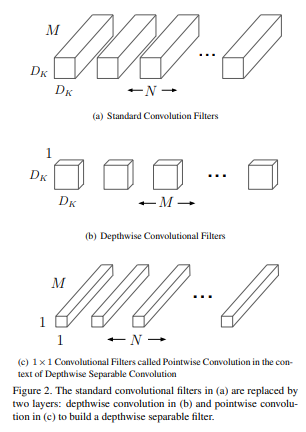

논문에서 발췌한 그림입니다. 개인적으로는 블로그에서 본 아래 그림이 잘 이해가 되었습니다.

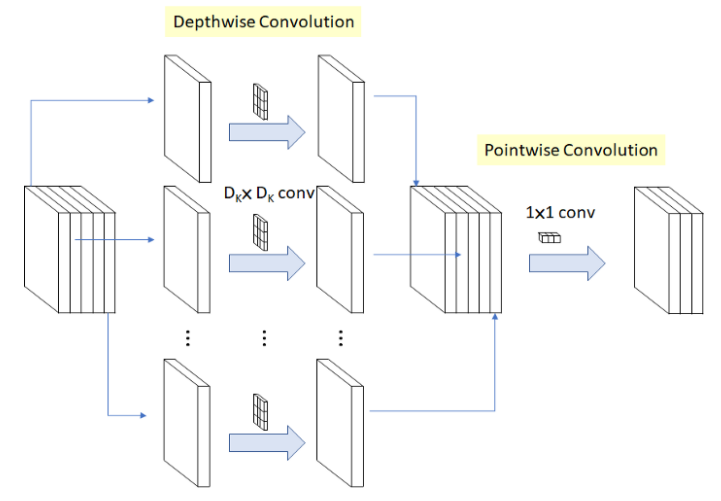

위 그림을 보면 Depthwise Convolution에서 각 입력 채널별로 구분하여 3x3 conv 필터가 각각의 연산을 수행하여 각 채널에 대한 피쳐맵을 생성하여 독립적인 saptial correlation을 계산하는 역할을 하게됩니다.<br>
그 다음 Pointwise conv에서는 각 피쳐맵을 결합하여 1x1 conv로 채널 수를 조정하여 모든 채널에 대해 연산을 진행합니다.<br>
MobileNet의 Depthwise separable convolution은 이러한 구조를 띄게됩니다.

### 1.3.2 Network Structure and Traning
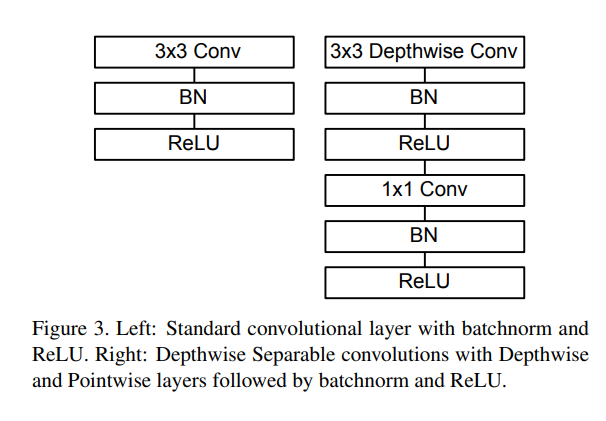

위 그림은 왼쪽은 Standard convolution layer이고 오른쪽은 Depthwise Separable convolution입니다.

In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, SeparableConv2D, BatchNormalization
from tensorflow.keras import Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
import os

In [4]:
# Cifar10 data set 정의
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteG1Z7YD/cifar10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteG1Z7YD/cifar10-test.tfrecord*...:   0%|          | 0/1…

Dataset cifar10 downloaded and prepared to ~/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


TypeError: ignored

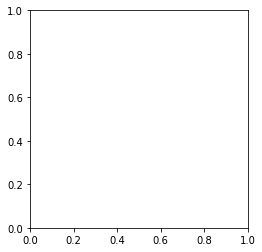

In [6]:
import matplotlib.pyplot as plt

plt.imshow(y_train[0])